<center><h2>The Predator - Prey Problem</h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
<p>
    Equations for coexistence of population of prey  =  p,  of Predators  =  P (variation of the Lotka - Volterra model) are solved with Runge-Kutta:
 
$$
\frac{dp}{dt}  =  a\,p-b\, p\, P,   \quad
  \frac{dP}{dt} = \epsilon\, b\, p \,P -m\,P  
 $$  

<IPython.core.display.Javascript object>


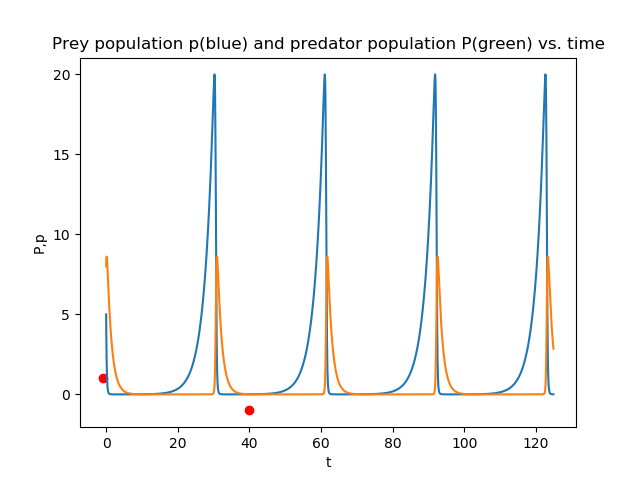

2000 2000


<IPython.core.display.Javascript object>


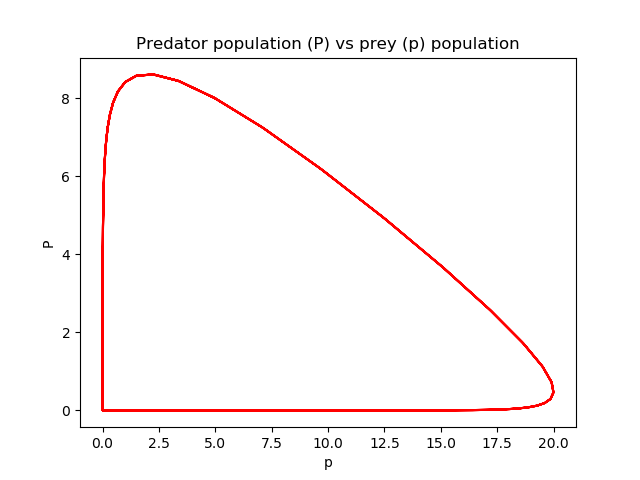

In [1]:
# PredatorPrey.py: Variations on the Lotka - Volterra model

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Tmin  =  0.0
Tmax  =  500.0                         # initial, final time
Ntimes  =  2000
y  = np.zeros(2)
yy0 = np.zeros(Ntimes)
yy1 = np.zeros(Ntimes)
tt = np.zeros(Ntimes)
y[0]  =  5.0     # prey initial 
y[1]  =  8.0     # predator                         
a = 0.1
b = 0.2
eps = 0.5
m = 0.2
h  =  (Tmax - Tmin)/Ntimes 
t  =  Tmin

def f(t, y):   # FUNCTION of your choice here
    rhs = np.zeros(2)
    rhs[0] = a*y[0]-b*y[0]*y[1]        # prey
    rhs[1] = eps*b*y[0]*y[1]-m*y[1]    # predator
    return rhs

def rk4Algor(t, h, N, y, f):
    k1 = np.zeros(N); k2 = np.zeros(N); k3 = np.zeros(N); k4 = np.zeros(N);
    k1  =  h*f(t,y)                             
    k2  =  h*f(t+h/2.,y+k1/2.)
    k3 =  h*f(t+h/2.,y+k2/2.)
    k4 =  h*f(t+h,y+k3)
    y = y+(k1+2*(k2+k3)+k4)/6.
    return y    

tt = np.arange(0,Tmax,h) 
j = 0
for t in np.arange(Tmin, Tmax , h):
    yy0[j] = y[0]    # prey
    yy1[j] = y[1]    # predator
    tt[j] = t*h
    y = rk4Algor(t,h,2, y, f)
    j += 1
    
plt.figure(0)
print(len(tt),len(yy0))
plt.plot(-1,1,'ro')
plt.plot(40,-1,'ro')
plt.plot(tt,yy0)    #prey vs t  
plt.title('Prey p (blue) and predator P (green) vs. time')
plt.ylabel('P,p')
plt.xlabel('t')
plt.plot(tt,yy1)   
plt.figure(1)
plt.plot(yy0,yy1,'r')  # phase diagram P vs p
plt.title('Predator (P) vs prey (p)')
plt.xlabel('p')
plt.ylabel('P')
plt.show()